In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima_model import *
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from collections import Counter
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 6

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
normal_df = pd.read_csv("dataset/Sensor_data_Normal.csv", parse_dates=True, index_col='Timestamp', dayfirst=True)
attack_df = pd.read_csv("dataset/Sensor_data_NA.csv", parse_dates=True, index_col='Timestamp', dayfirst=True)

### Plotting correlation graph

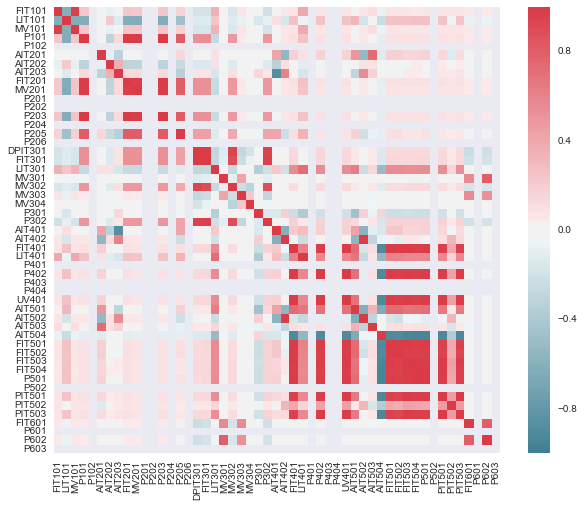

In [9]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = normal_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
# plt.matshow(normal_df.ix[:, 0:6].correlate())

### Select data till the first instance of "Attack"

In [42]:
first_occurence = attack_df['Normal/Attack'].ne('Normal').idxmax()

In [43]:
normal_vals_from_attack = attack_df[attack_df.index < first_occurence]

In [44]:
normal_vals_from_attack

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-28 10:00:00,2.427057,522.8467,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.5988,0.000128,1,1,1,Normal
2015-12-28 10:00:01,2.446274,522.8860,2,2,1,262.0161,8.396437,328.6337,2.445391,2,...,2,1,250.8652,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:02,2.489191,522.8467,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6789,0.000128,1,1,1,Normal
2015-12-28 10:00:03,2.534350,522.9645,2,2,1,262.0161,8.394514,328.6337,2.442316,2,...,2,1,250.8812,1.649953,189.6148,0.000128,1,1,1,Normal
2015-12-28 10:00:04,2.569260,523.4748,2,2,1,262.0161,8.394514,328.6337,2.443085,2,...,2,1,250.8812,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:05,2.609294,523.8673,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,2,1,250.7530,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:06,2.637158,524.1028,2,2,1,262.0161,8.394514,328.6337,2.444110,2,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:07,2.652211,524.2206,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,2,1,250.5928,1.649953,189.5027,0.000128,1,1,1,Normal
2015-12-28 10:00:08,2.655735,524.4954,2,2,1,262.0161,8.394514,328.6337,2.441803,2,...,2,1,250.9132,1.649953,189.5027,0.000128,1,1,1,Normal


#### Appending and creating training set

In [45]:
training_data = normal_df.append(normal_vals_from_attack)

In [46]:
test_data = attack_df[attack_df.index >= first_occurence]

#### Check if any un-processed data remains

In [ ]:
test_data[test_data['Normal/Attack'] == 'A ttack']

In [48]:
Counter(test_data['Normal/Attack'])

Counter({'Attack': 53900, 'Normal': 394265})

In [49]:
training_data

,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,MV201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-22 16:00:00,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:01,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:02,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:03,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:04,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:05,2.425456,260.0495,2,2,1,244.5847,8.190080,306.1010,2.465127,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:06,2.472857,260.2065,2,2,1,244.5847,8.190080,306.1010,2.464742,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:07,2.513532,260.5991,2,2,1,244.5847,8.190080,306.1010,2.468331,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2015-12-22 16:00:08,2.559972,261.0309,2,2,1,244.5847,8.190080,306.1010,2.469612,2,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal


### Function to plot ARMA and auto-correlation graphs

In [50]:
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

#### Sampling training data in terms of Minutes

In [60]:
minute_df = pd.DataFrame()

In [61]:
minute_df['LIT101'] = training_data.LIT101.resample('T').mean()
minute_df['LIT101'] = minute_df['LIT101'].dropna()
minute_df['LIT101']

Timestamp
2015-12-22 16:00:00    261.505800
2015-12-22 16:01:00    262.510665
2015-12-22 16:02:00    262.969277
2015-12-22 16:03:00    473.142657
2015-12-22 16:04:00    281.983265
2015-12-22 16:05:00    269.679535
2015-12-22 16:06:00    260.676255
2015-12-22 16:07:00    245.771988
2015-12-22 16:08:00    232.036140
2015-12-22 16:09:00    219.294695
2015-12-22 16:10:00    207.420732
2015-12-22 16:11:00    197.017445
2015-12-22 16:12:00    187.009292
2015-12-22 16:13:00    177.754817
2015-12-22 16:14:00    169.529390
2015-12-22 16:15:00    161.858743
2015-12-22 16:16:00    155.749708
2015-12-22 16:17:00    149.848060
2015-12-22 16:18:00    144.418752
2015-12-22 16:19:00    140.148707
2015-12-22 16:20:00    136.854750
2015-12-22 16:21:00    134.100505
2015-12-22 16:22:00    131.768895
2015-12-22 16:23:00    130.169340
2015-12-22 16:24:00    129.561577
2015-12-22 16:25:00    127.774928
2015-12-22 16:26:00    126.641178
2015-12-22 16:27:00    125.811635
2015-12-22 16:28:00    125.578735
2015

### Function to compute the Least AIC and tune parameters accordingly

aic: 56303.35048 | order: (3, 1, 2)
                             ARIMA Model Results                              
Dep. Variable:               D.LIT101   No. Observations:                 8309
Model:                 ARIMA(3, 1, 2)   Log Likelihood              -28145.675
Method:                           mle   S.D. of innovations              7.158
Date:                Mon, 05 Jun 2017   AIC                          56303.350
Time:                        23:19:37   BIC                          56345.501
Sample:                    12-22-2015   HQIC                         56317.751
                         - 12-28-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.LIT101     1.5460      0.066     23.350      0.000       1.416       1.676
ar.L2.D.LIT101    -0.2442      0.124     -1.973      0.049      -0.487      -0.002


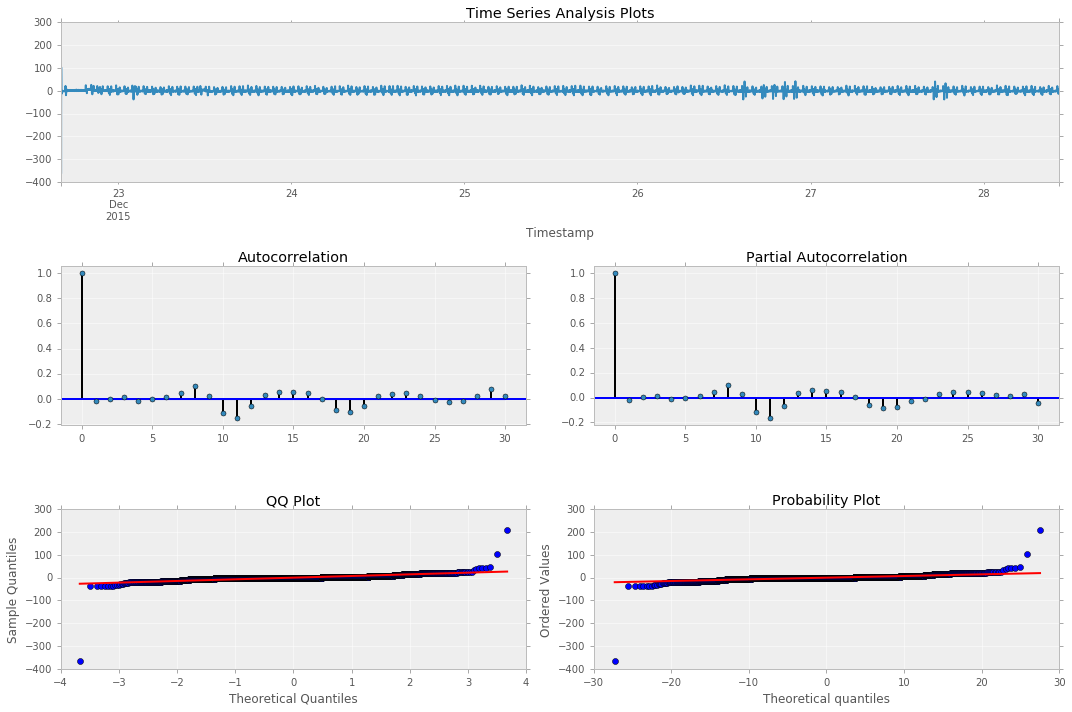

In [71]:
best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(1,4) # [0,1,2,3,4]
d_rng = range(1,3) # [0,1]
for i in pq_rng:
    for j in d_rng:
            try:
                tmp_mdl = smt.ARIMA(minute_df['LIT101'], order=(i,1,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, d, j)
                    best_mdl = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)
print best_mdl.summary()
# ARIMA model resid plot
_ = tsplot(best_mdl.resid, lags=30)

### Use the parameters learned by the best model on Train set and apply it on test set

In [72]:
test_mod_lit = ARIMA(test_data['LIT101'], (3,1,2)).fit(start_params = best_mdl.params, transpars = False, method='mle', trend='nc')

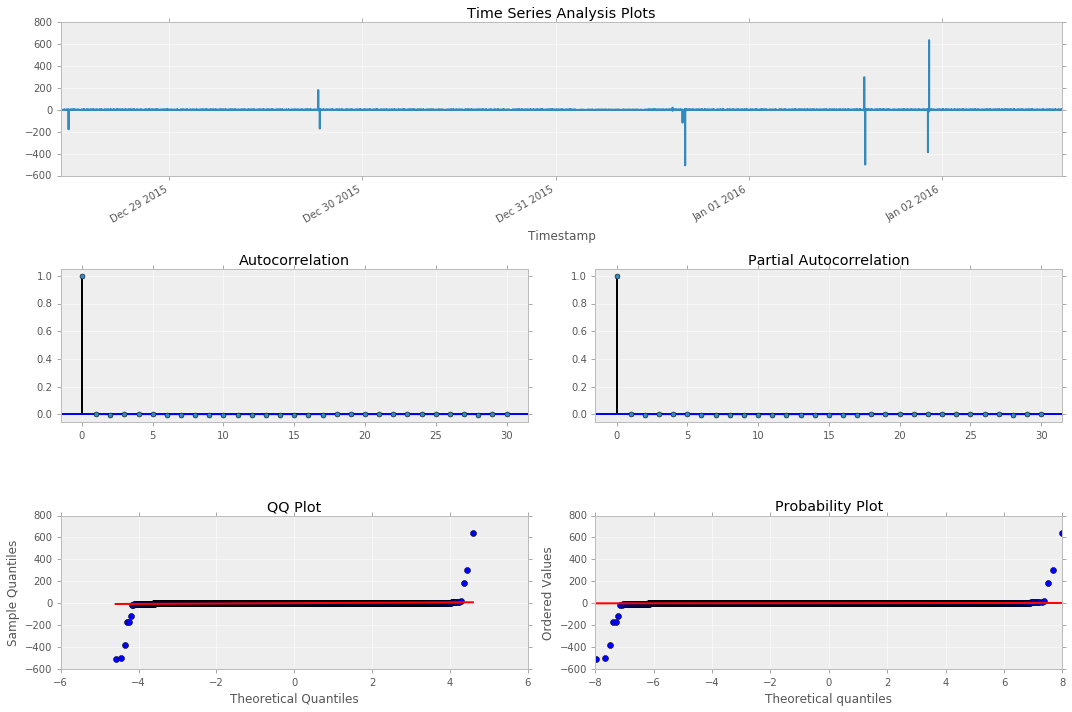

In [73]:
_ = tsplot(test_mod_lit.resid.dropna(), lags=30)

In [74]:
test_std_lit = np.std(test_mod_lit.resid)
threshold = 2*test_std_lit
det_anom_lit = test_mod_lit.resid[test_mod_lit.resid > threshold]
det_anom_lit

### Similary resample for FIT101 and AIT101

In [90]:
minute_df['FIT101'] = training_data.FIT101.resample('T').mean()

/Applications/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


aic: 6015.66918 | order: (1, 1, 1)
                             ARIMA Model Results                              
Dep. Variable:               D.FIT101   No. Observations:                 8309
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3004.835
Method:                           mle   S.D. of innovations              0.347
Date:                Tue, 06 Jun 2017   AIC                           6015.669
Time:                        00:44:37   BIC                           6036.744
Sample:                    12-22-2015   HQIC                          6022.869
                         - 12-28-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.FIT101    -0.0045      0.043     -0.105      0.916      -0.089       0.080
ma.L1.D.FIT101     0.2603      0.041      6.274      0.000       0.179       0.342
 

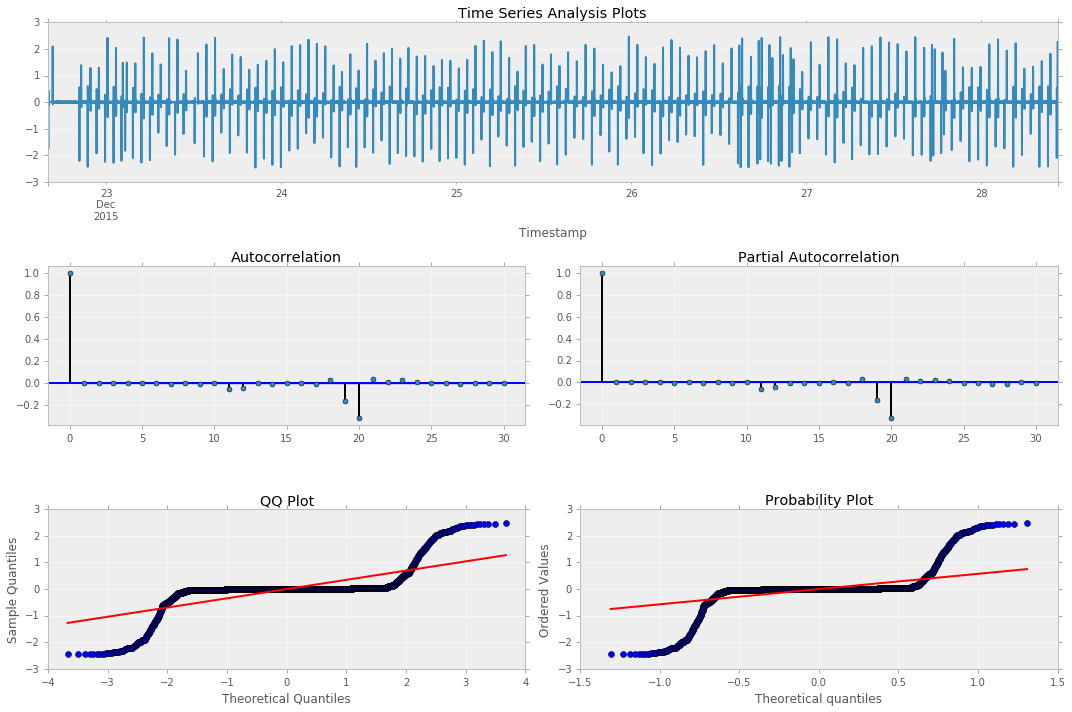

In [99]:
best_aic_fit = np.inf 
best_order_fit = None
best_mdl_fit = None

pq_rng = range(1,4) # [0,1,2,3,4]
d_rng = range(1,3) # [0,1]
for i in pq_rng:
    for j in d_rng:
            try:
                tmp_mdl = smt.ARIMA(minute_df['FIT101'], order=(i,1,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_fit:
                    best_aic_fit = tmp_aic
                    best_order_fit = (i, d, j)
                    best_mdl_fit = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic_fit, best_order_fit))
# aic: -11518.22902 | order: (4, 0, 4)
print best_mdl_fit.summary()
# ARIMA model resid plot
_ = tsplot(best_mdl_fit.resid, lags=30)

In [100]:
test_mod_fit = ARIMA(test_data['FIT101'], (1,1,1)).fit(start_params = best_mdl_fit.params, transpars = False, method='mle', trend='nc')

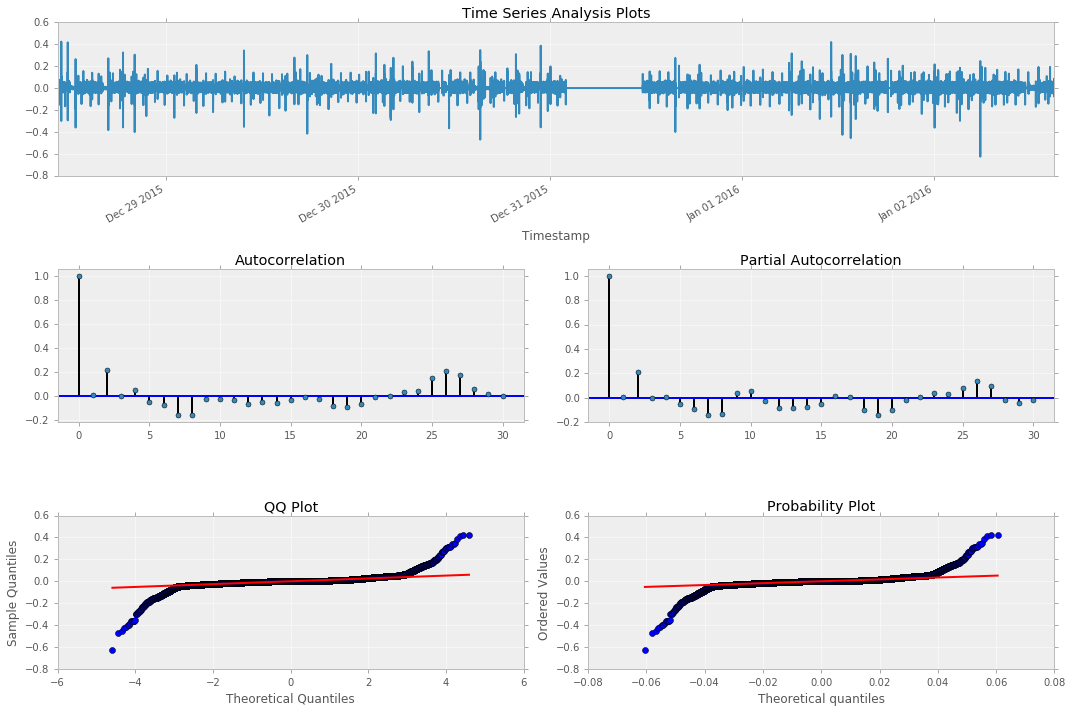

In [101]:
_ = tsplot(test_mod_fit.resid.dropna(), lags=30)

In [103]:
test_std = np.std(test_mod_fit.resid)
threshold = 2*test_std
det_anom = test_mod_fit.resid[test_mod_fit.resid > threshold]
det_anom

Timestamp
2015-12-28 10:29:15    0.042276
2015-12-28 10:29:17    0.035649
2015-12-28 10:29:41    0.048205
2015-12-28 10:30:06    0.037698
2015-12-28 10:30:31    0.031807
2015-12-28 10:30:57    0.045275
2015-12-28 10:31:23    0.027248
2015-12-28 10:32:17    0.036054
2015-12-28 10:32:42    0.026752
2015-12-28 10:32:43    0.027184
2015-12-28 10:32:45    0.040543
2015-12-28 10:33:09    0.044194
2015-12-28 10:33:34    0.033131
2015-12-28 10:34:02    0.044243
2015-12-28 10:34:27    0.037732
2015-12-28 10:34:52    0.053484
2015-12-28 10:35:44    0.033883
2015-12-28 10:36:09    0.036320
2015-12-28 10:36:36    0.033660
2015-12-28 10:37:02    0.028155
2015-12-28 10:37:55    0.028525
2015-12-28 10:38:20    0.026001
2015-12-28 10:38:46    0.026730
2015-12-28 10:38:51    0.026577
2015-12-28 10:39:13    0.049268
2015-12-28 10:39:39    0.040054
2015-12-28 10:40:04    0.026614
2015-12-28 10:40:28    0.034723
2015-12-28 10:40:32    0.033640
2015-12-28 10:40:52    0.027011
                         ...  

### Resampling for AIT201

In [94]:
minute_df['AIT201'] = training_data.AIT201.resample('T').mean()

aic: -14197.91514 | order: (3, 1, 1)
                             ARIMA Model Results                              
Dep. Variable:               D.AIT201   No. Observations:                 8309
Model:                 ARIMA(3, 1, 1)   Log Likelihood                7103.958
Method:                           mle   S.D. of innovations              0.103
Date:                Tue, 06 Jun 2017   AIC                         -14197.915
Time:                        00:23:20   BIC                         -14162.790
Sample:                    12-22-2015   HQIC                        -14185.915
                         - 12-28-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
ar.L1.D.AIT201     0.8077      0.046     17.431      0.000       0.717       0.899
ar.L2.D.AIT201    -0.0621      0.017     -3.660      0.000      -0.095      -0.029

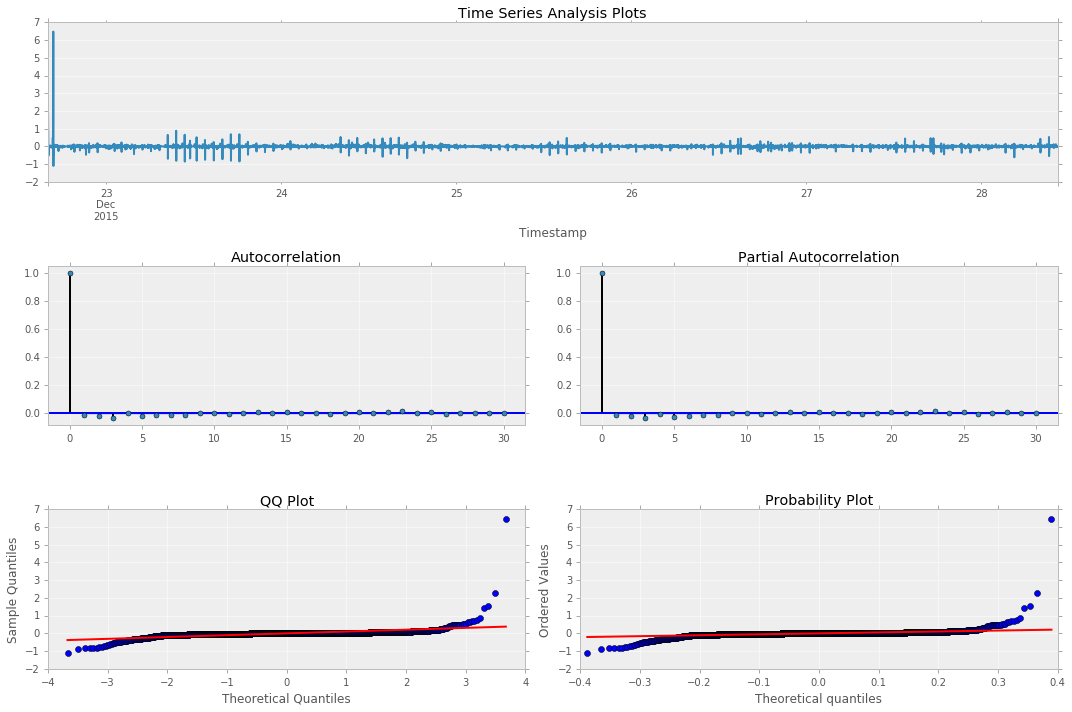

In [95]:
best_aic_mv = np.inf 
best_order_mv = None
best_mdl_mv = None

pq_rng = range(1,4) # [0,1,2,3,4]
d_rng = range(1,3) # [0,1]
for i in pq_rng:
    for j in d_rng:
            try:
                tmp_mdl = smt.ARIMA(minute_df['AIT201'], order=(i,1,j)).fit(method='mle', trend='nc')
                tmp_aic = tmp_mdl.aic
                if tmp_aic < best_aic_mv:
                    best_aic_mv = tmp_aic
                    best_order_mv = (i, d, j)
                    best_mdl_mv = tmp_mdl
            except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic_mv, best_order_mv))
# aic: -11518.22902 | order: (4, 0, 4)
print best_mdl_mv.summary()
# ARIMA model resid plot
_ = tsplot(best_mdl_mv.resid, lags=30)

In [96]:
test_mod_ait = ARIMA(test_data['AIT201'], (3,1,1)).fit(start_params = best_mdl_mv.params, transpars = False, method='mle', trend='nc')

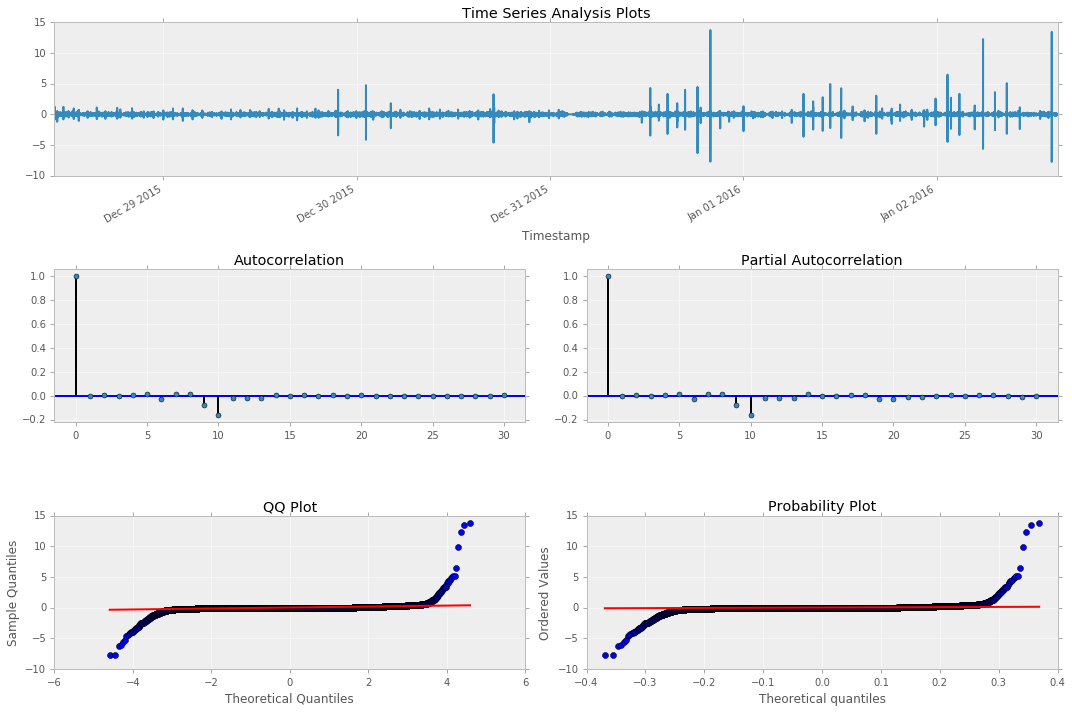

In [97]:
_ = tsplot(test_mod_ait.resid.dropna(), lags=30)

In [109]:
test_std = np.std(test_mod_ait.resid)
threshold = 2*test_std
det_anom = test_mod_ait.resid[test_mod_ait.resid > threshold]
det_anom

Timestamp
2015-12-28 10:30:36     1.281700
2015-12-28 10:30:43     0.608524
2015-12-28 10:30:47     0.169445
2015-12-28 10:30:50     0.545695
2015-12-28 10:30:54     0.322152
2015-12-28 10:30:57     0.181089
2015-12-28 10:34:45     0.236167
2015-12-28 10:41:42     0.226559
2015-12-28 10:46:20     0.174599
2015-12-28 10:47:05     0.224400
2015-12-28 10:50:54     0.540742
2015-12-28 10:50:57     0.176986
2015-12-28 10:51:00     0.291356
2015-12-28 10:51:02     0.534272
2015-12-28 10:51:03     0.434886
2015-12-28 10:58:08     0.192300
2015-12-28 10:58:14     0.283619
2015-12-28 10:58:16     0.342538
2015-12-28 10:58:57     0.160300
2015-12-28 11:00:40     0.256400
2015-12-28 11:06:08     0.320400
2015-12-28 11:11:34     0.160200
2015-12-28 11:11:40     0.170892
2015-12-28 11:11:47     0.160204
2015-12-28 11:12:13     0.225815
2015-12-28 11:15:34     0.192829
2015-12-28 11:16:13     0.196322
2015-12-28 11:16:16     0.355303
2015-12-28 11:16:48     0.160200
2015-12-28 11:26:09     0.160200


### Combining residual results
Checking the residual values for LIT101 since anomalies have been reported for this sensor

In [110]:
test_std_lit = np.std(test_mod_lit.resid)
threshold = 2*test_std_lit
det_anom_lit = test_mod_lit.resid[test_mod_lit.resid > threshold]
det_anom_lit

Timestamp
2015-12-28 11:28:05      3.430021
2015-12-29 18:29:59    182.207475
2015-12-29 18:41:42      3.523263
2015-12-29 18:41:43      3.663074
2015-12-31 14:32:20     20.962181
2015-12-31 16:06:26     10.448032
2015-12-31 16:06:27     10.241146
2015-12-31 16:06:28      6.769937
2015-12-31 16:06:29      5.223879
2015-12-31 16:06:30      4.464755
2015-12-31 16:06:31      4.311860
2015-12-31 16:06:32      4.006300
2015-12-31 16:06:33      4.366659
2015-12-31 16:06:34      4.555529
2015-12-31 16:06:35      3.654675
2015-12-31 16:06:36      4.273656
2015-12-31 16:06:37      3.903383
2015-12-31 16:06:38      4.283949
2015-12-31 16:06:39      4.423215
2015-12-31 16:06:40      3.891403
2015-12-31 16:06:41      4.079350
2015-12-31 16:06:42      3.794101
2015-12-31 16:06:44      3.710979
2015-12-31 16:06:46      3.898340
2015-12-31 16:06:47      3.806997
2015-12-31 16:06:48      4.697069
2015-12-31 16:06:49      4.393085
2015-12-31 16:06:50      4.056941
2015-12-31 16:06:51      3.930082
2015

### Creating a dictionary of start and end time of attacks for LIT101

In [ ]:
lit_attack_report = {}
lit_attack_report['STARTTIME'] = ['12/28/2015  11:22:00', '12/29/2015  18:30:00', '12/31/2015  15:47:40', 
                                  '1/1/2016  14:21:12', '1/1/2016  22:16:01']
lit_attack_report['ENDTIME'] = ['12/28/2015 11:28:22', '12/29/2015 18:42:00', '12/31/2015 16:07:10', 
                                '1/1/2016 14:28:35', '1/1/2016 22:25:00']

In [121]:
lit_attack_report["STARTTIME"] = pd.to_datetime(lit_attack_report["STARTTIME"], dayfirst=True)
lit_attack_report["ENDTIME"] = pd.to_datetime(lit_attack_report["ENDTIME"], dayfirst=True)

#### Just using the time instead of dates since Pandas' .between_time() can detect only time formats.

In [175]:
lit_attack_report['STARTTIME'] = ['11:22:00', '18:29:59', '15:47:40', 
                                  '14:21:12', '22:16:01']
lit_attack_report['ENDTIME'] = ['11:28:22', '18:42:00', '16:07:10', 
                                '14:28:35', '22:25:00']

In [176]:
lit_attack_report

{'ENDTIME': ['11:28:22', '18:42:00', '16:07:10', '14:28:35', '22:25:00'],
 'STARTTIME': ['11:22:00', '18:29:59', '15:47:40', '14:21:12', '22:16:01']}

In [159]:
ret = det_anom_lit[det_anom_lit.between_time(lit_attack_report['STARTTIME'][1], lit_attack_report['ENDTIME'][1])]

In [168]:
ret
len(ret)

2

### Function to measure the performance of the model. 
 - Calculate number of anomaly instances in each segment
 - Calculate total anomaly instances in the residual vector
 - Compute total anomalies found

In [177]:
anomaly_count = 0
anomaly_inst_count = 0
for i in range(len(lit_attack_report['STARTTIME'])):
    print "Start Time : {}"  .format(lit_attack_report["STARTTIME"][i])
    anom = det_anom_lit[det_anom_lit.between_time(lit_attack_report['STARTTIME'][i], lit_attack_report['ENDTIME'][i])]
    anom_instances = len(anom)
    no_of_sec = pd.to_datetime(lit_attack_report['ENDTIME'][i]) - pd.to_datetime(lit_attack_report['STARTTIME'][i])
    print "Anomaly instance : {} out of {} instances".format(anom_instances, no_of_sec.seconds)
    print "End Time : {}" .format(lit_attack_report['ENDTIME'][i])
    anomaly_inst_count = anomaly_inst_count + anom_instances
    anomaly_count = anomaly_count + 1
print " Total Anomaly instances found : {} out of {} values".format(anomaly_inst_count, len(det_anom_lit))
print " Total Anomalies found : {} out of {} values" .format(anomaly_count, len(lit_attack_report['STARTTIME']))

Start Time : 11:22:00
Anomaly instance : 1 out of 382 instances
End Time : 11:28:22
Start Time : 18:29:59
Anomaly instance : 3 out of 721 instances
End Time : 18:42:00
Start Time : 15:47:40
Anomaly instance : 30 out of 1170 instances
End Time : 16:07:10
Start Time : 14:21:12
Anomaly instance : 1 out of 443 instances
End Time : 14:28:35
Start Time : 22:16:01
Anomaly instance : 5 out of 539 instances
End Time : 22:25:00
 Total Anomaly instances found : 40 out of 70 values
 Total Anomalies found : 5 out of 5 values
